In [7]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
data=np.array(unpickle('data_batch_1') [b'data'])
label=np.array(unpickle('data_batch_1') [b'labels'])
for i in range(2,6):
    data_dict = unpickle('data_batch_'+str(i))
    data = np.concatenate((data, data_dict[b'data']))
    label = np.concatenate((label, data_dict[b'labels']))

In [8]:
cat_data=[]
for i in range(0,10):
    cat_data.append(data[label==i])
all_cov=np.array([np.cov(data[label==i],rowvar=False) for i in range(0,10)])

In [9]:
eigv_20=[]
for i in range(0,10):
    eigv, ev= LA.eigh(all_cov[i])
    eigv_20.append(ev[:,3052:3072])

In [12]:
def func(cat,index):
    new_data=np.matmul(cat,eigv_20[index])
    error=np.sum(np.sqrt(np.power(np.linalg.norm(cat,axis=1),2)-np.power(np.linalg.norm(new_data,axis=1),2)))/5000
    return error

In [13]:
error=[]
for i in range(0,10):
    error.append(func(cat_data[i],i))

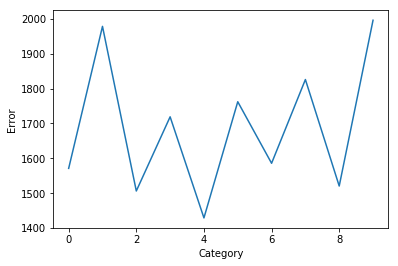

In [14]:
plt.plot(np.array(error))
plt.xlabel('Category')
plt.ylabel('Error')
plt.show()